In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def round_2(n: float):
    if n == '':
        return
    try:
        return float(np.format_float_positional(float(n), precision=2))
    except Exception:
        print(f'Unable to convert {n} to float')


gdp_df = pd.read_csv('data/gdp_per_capita.csv', converters={'Value': round_2})

gdp_df.info()
gdp_df.head(10)
gdp_df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB


,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.89,NaN
6866,Zimbabwe,1991,3426.60,NaN
6867,Zimbabwe,1990,3324.35,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [3]:
# 6.

gdp_df_revised = gdp_df \
    .drop(columns=['Value Footnotes']) \
    .dropna(subset=['Value']) \
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

gdp_df_revised.tail()


,Country,Year,GDP_Per_Capita
6863,Zimbabwe,1994,3263.93
6864,Zimbabwe,1993,3033.50
6865,Zimbabwe,1992,3054.89
6866,Zimbabwe,1991,3426.60
6867,Zimbabwe,1990,3324.35


In [4]:
# 7

print(f'The dataframe has {gdp_df_revised.shape[0]} rows')

column_dtypes = gdp_df_revised.dtypes.to_dict()

for column in column_dtypes:
    print(f'The datatype of column {column} is {column_dtypes[column]}')

The dataframe has 6868 rows
The datatype of column Country is object
The datatype of column Year is object
The datatype of column GDP_Per_Capita is float64


The years represented include: 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990.
Some years have fewer observations than others.


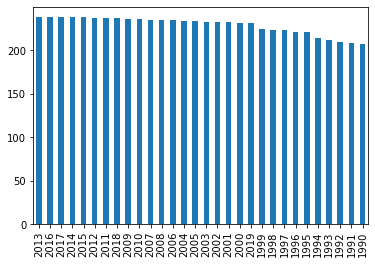

In [5]:
# 8

years_represented = gdp_df_revised.Year.unique()

print(f'The years represented include: {str.join(", ", years_represented)}.')

gdp_df_revised.Year.value_counts().plot(kind='bar')

print('Some years have fewer observations than others.')

In [6]:
# 9

countries = gdp_df_revised.Country.value_counts()

country_stats = countries.describe()

countries_with_less_than_30_observations = DataFrame(countries).query('Country < 30')

print(f'Of the {countries.size} counted, most countries had {int(country_stats["25%"])} observations.')
print(f'However, {countries_with_less_than_30_observations.size} had fewer than that')
print(f'Some had as few as {country_stats["min"]} observations.')
print(f'Those countries with less than {int(country_stats["25%"])} were: {countries_with_less_than_30_observations.index}')
print('The lack of observations for these countries is probably due in part to political instability (eg West Bank and Gaza)')

Of the 238 counted, most countries had 30 observations.
However, 35 had fewer than that
Some had as few as 7.0 observations.
Those countries with less than 30 were: Index(['Marshall Islands', 'Hungary', 'Micronesia', 'Turkmenistan', 'Aruba',
       'Slovak Republic', 'Cambodia', 'Estonia', 'Small states',
       'Bosnia and Herzegovina', 'West Bank and Gaza', 'Croatia', 'Lithuania',
       'Maldives', 'Latvia', 'Serbia', 'Moldova', 'Kuwait', 'Montenegro',
       'San Marino', 'Libya', 'Kosovo', 'Palau', 'Other small states',
       'CuraÃ§ao', 'Liberia', 'Timor-Leste', 'Qatar',
       'SÃ£o TomÃ© and Principe', 'Afghanistan', 'Nauru', 'Cayman Islands',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Djibouti'],
      dtype='object')
The lack of observations for these countries is probably due in part to political instability (eg West Bank and Gaza)


In [7]:
# 10

gdp_2014 = gdp_df_revised.set_index('Year').loc['2014']

In [8]:
# 11

gdp_2014.describe()

,GDP_Per_Capita
count,238.000000
mean,19766.710420
std,20983.869499
min,822.610000
25%,4753.115000
50%,12209.385000
75%,26803.607500
max,156514.130000


array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

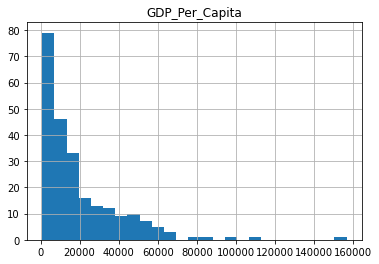

In [9]:
# 12

gdp_2014.hist(bins=25)

In [10]:
# 13

gdp_2014_sorted = gdp_2014.sort_values(by='GDP_Per_Capita')
gdp_2014_top_5 = gdp_2014_sorted.head()
gdp_2014_bottom_5 = gdp_2014_sorted.tail()

In [11]:
# 14

gdp_df.info()
gdp_df_revised.info()
gdp_pivoted = gdp_df_revised\
    .query('Year == "1990" or Year == "2017"')\
    .pivot_table(
        index='Country',
        columns='Year',
        values='GDP_Per_Capita')\
    .dropna()

gdp_pivoted.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   object 
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), object(2)
memory usage: 214.6+ KB


Year,1990,2017
Country,,
Albania,4842.73,12811.76
Algeria,8746.35,11737.41
Angola,5783.43,7310.90
Antigua and Barbuda,15459.55,19840.08
Arab World,9694.67,14555.47


In [12]:
# 15

def pct_change(old_value, new_value):
    return 100 * (new_value - old_value) / old_value

gdp_pivoted['Percent_Change'] = pct_change(gdp_pivoted['1990'], gdp_pivoted['2017'])

gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.73,12811.76,164.556562
Algeria,8746.35,11737.41,34.197808
Angola,5783.43,7310.90,26.411144
Antigua and Barbuda,15459.55,19840.08,28.335430
Arab World,9694.67,14555.47,50.138891


In [13]:
# 16

countries_with_negative_gdp_growth = gdp_pivoted.query('Percent_Change < 0')

print(f'A total of {countries_with_negative_gdp_growth.size} countries had negative gdp growth from 1990 to 2017')

A total of 51 countries had negative gdp growth from 1990 to 2017


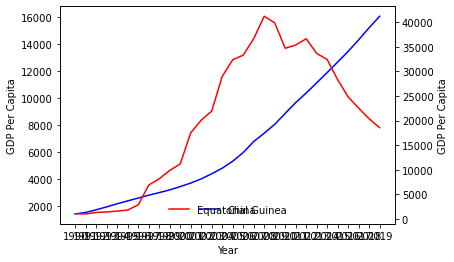

In [14]:
# 17

top_two_gdp_countries = gdp_pivoted.sort_values(by='Percent_Change', ascending=False).head(2).index.values

top_two_df = gdp_df_revised[gdp_df_revised.Country.isin(top_two_gdp_countries)].set_index('Year')

country_names = top_two_df.Country.unique()

fig, ax = plt.subplots()

def get_country_gdp_history(country_name):
    return top_two_df[top_two_df.Country == country_name].sort_values(by='Year')

def plot_country_gdp(axes, country_df, label, color):
    axes.plot(country_df.index, country_df.GDP_Per_Capita, color=color, label=label)
    axes.legend(frameon=False, loc='lower center', ncol=2)
    axes.set_xlabel('Year')
    axes.set_ylabel('GDP Per Capita')

country_a = get_country_gdp_history(country_names[0])
country_b = get_country_gdp_history(country_names[1])

ax2 = ax.twinx()

plot_country_gdp(ax, country_a, country_names[0], 'b')
plot_country_gdp(ax2, country_b, country_names[1], 'r')

In [15]:
# 18

continents = pd.read_csv('data/continents.csv')

continents.info()
continents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  216 non-null    object
 1   Country    216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [16]:
# 19

gdp_df_revised = gdp_df_revised.merge(continents, on='Country', how='left')
gdp_df_revised.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.04,Asia
1,Afghanistan,2018,2033.78,Asia
2,Afghanistan,2017,2058.38,Asia
3,Afghanistan,2016,2057.06,Asia
4,Afghanistan,2015,2068.27,Asia


In [17]:
# 20

countries_per_continent = gdp_df_revised\
    .groupby('Continent')['Country']\
    .unique()\
    .reset_index()

for index, row in countries_per_continent.iterrows():
    print(f'{row.Continent} has {row.Country.size} countries')

Africa has 49 countries
Asia has 43 countries
Europe has 45 countries
North America has 26 countries
Oceania has 14 countries
South America has 11 countries


<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

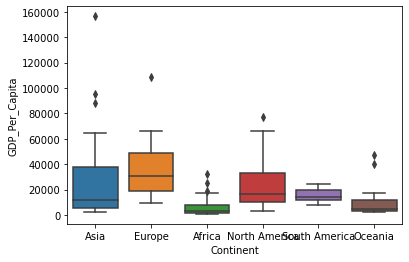

In [18]:
# 21

gdp_2014 = gdp_df_revised.query('Year == "2014"')

sns.boxplot(x = gdp_2014.Continent, y = gdp_2014.GDP_Per_Capita)

# Asia has the highest number of extreme outliers, and one of the largest spreads.
# Africa, South America, and Oceania have the narrowest spreads,
# though Oceania does have a few extreme outliers.

In [19]:
# 22
def is_year_filter(obj):
    try:
        datetime.strptime(obj, '%Y')
        return obj
    except Exception:
        # print(f'{obj} is not a year')
        return

def is_numeric_filter(obj):
    try:
        float(obj)
        return obj
    except Exception:
        # print(f'{obj} is not a number')
        return

internet_df = pd.read_csv(
    'data/internet_use.csv',
    converters=
    {
        'Year': is_year_filter,
        'Value': is_numeric_filter
    }
).dropna(subset=['Year', 'Value'])

internet_df.info()
internet_df.head()

# FYI, how to fix issue importing the internet use csv for Question 22
# (you will probably see an error along the lines of "expected 6 but got 4"),
# you can fix by manually opening the csv and deleting the two empty columns on the right.
# And if you're like me and don't have Excel and are using a Mac,
# using Numbers you can go to File -> Export and export the edited file as a CSV.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  4495 non-null   object
 1   Year             4495 non-null   object
 2   Value            4495 non-null   object
 3   Value Footnotes  948 non-null    object
dtypes: object(4)
memory usage: 175.6+ KB


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.39,NaN
1,Afghanistan,2013,5.9,NaN
2,Afghanistan,2012,5.45454545454545,NaN
3,Afghanistan,2011,5,NaN
4,Afghanistan,2010,4,NaN


In [20]:

internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080326724463,NaN
4491,Zimbabwe,1996,0.016790483892511,NaN
4492,Zimbabwe,1995,0.00768353991953285,NaN
4493,Zimbabwe,1994,0.00173927955909959,NaN
4494,Zimbabwe,1990,0,NaN


In [21]:
# 23

internet_df = internet_df\
    .drop(columns=['Value Footnotes'])\
    .rename(columns=
    {
        'Country or Area': 'Country',
        'Value': 'Internet_Users_Pct'
    })\
    .astype({'Internet_Users_Pct': float})

internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [22]:
# 24

print(f'The new dataset has {internet_df.shape[0]} rows and {internet_df.columns.size} columns')

internet_df.info()

The new dataset has 4495 rows and 3 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB


In [23]:
# 25

internet_df\
    .query('Internet_Users_Pct > 0')\
    .sort_values(by='Internet_Users_Pct', ascending=True)\
    .head(1)

,Country,Year,Internet_Users_Pct
1318,Ethiopia,1995,0.000018


In [24]:
# 26 - 27

gdp_and_internet_use = gdp_df_revised.merge(internet_df, on=['Country', 'Year'])

gdp_and_internet_use.info()
gdp_and_internet_use.head()
gdp_and_internet_use.tail()

# countries_diff = list(set(internet_df.Country.unique()) - set(gdp_df_revised.Country.unique()))

# print(countries_diff)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 3457
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3458 non-null   object 
 1   Year                3458 non-null   object 
 2   GDP_Per_Capita      3458 non-null   float64
 3   Continent           3458 non-null   object 
 4   Internet_Users_Pct  3458 non-null   float64
dtypes: float64(2), object(3)
memory usage: 162.1+ KB


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3453,Zimbabwe,1997,3580.05,Africa,0.033080
3454,Zimbabwe,1996,3520.43,Africa,0.016790
3455,Zimbabwe,1995,3226.41,Africa,0.007684
3456,Zimbabwe,1994,3263.93,Africa,0.001739
3457,Zimbabwe,1990,3324.35,Africa,0.000000


In [25]:
# 28

heavy_usage_countries = gdp_and_internet_use\
    .set_index('Year')\
    .loc['2014']\
    .query('Internet_Users_Pct > 90')

print(f'There are {heavy_usage_countries.shape[0]} countries with > 90% internet usage')


There are 13 countries with > 90% internet usage


In [26]:
# 29

top_3_gdp_2014 = gdp_and_internet_use\
    .set_index('Year')\
    .loc['2014']\
    .sort_values(by='GDP_Per_Capita', ascending=False)\
    .head(3)

top_3_gdp_history = gdp_and_internet_use.set_index('Country').loc[top_3_gdp_2014.Country]

# top_3_gdp_history.reset_index().head()

# fg = sns.FacetGrid(top_3_gdp_history.reset_index(), col='GDP_Per_Capita', row='Year')
# fg.map(sns.scatterplot, 'GDP_Per_Capita', 'Year')

top_3_gdp_history.head()

# TODO: I don't get how to use facetgrids with this dataset

,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
Country,,,,
Luxembourg,2014,108760.92,Europe,94.670000
Luxembourg,2013,106767.28,Europe,93.776500
Luxembourg,2012,105411.46,Europe,91.949924
Luxembourg,2011,108355.58,Europe,90.029859
Luxembourg,2010,108047.35,Europe,90.620000


Text(0, 0.5, '% Internet Users')

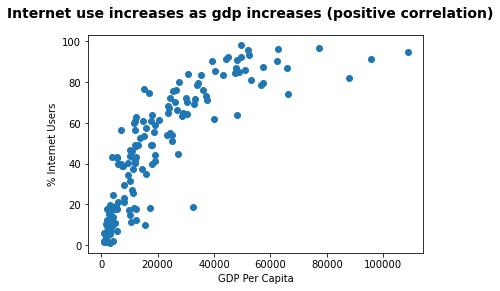

In [40]:
# 30

gdp_and_internet_use_2014 = gdp_and_internet_use\
    .set_index('Year')\
    .loc['2014']

fig = plt.figure()
fig.suptitle('Internet use increases as gdp increases (positive correlation)', fontsize=14, fontweight='bold')
plt.scatter(x='GDP_Per_Capita', y='Internet_Users_Pct', data=gdp_and_internet_use_2014)
plt.xlabel('GDP Per Capita')
plt.ylabel('% Internet Users')


In [43]:
# 31

gdp_internet_corr = gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

print(f'The correlation of gdp and internet usage is {gdp_internet_corr}. This indicates a strong correlation.')

0.8246267155832329

In [46]:
# 32

gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

log_and_internet_corr = gdp_and_internet_use_2014['GDP_Per_Capita_Log'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

print(f'The correlation of gdp log and internet usage is {log_and_internet_corr}. I am not sure why it is higher than the previous correlation.')

The correlation of gdp log and internet usage is 0.903986651597918. I am not sure why it is higher than the previous correlation.


In [50]:
# 33

us_df = gdp_and_internet_use\
    .set_index('Country')\
    .loc['United States']

us_corr = us_df['GDP_Per_Capita'].corr(us_df['Internet_Users_Pct'])

print(f'The correlation between gdp and internet usage is higher in the US than it is globally, coming in at {us_corr}')

The correlation between gdp and internet usage is higher in the US than it is globally, coming in at 0.9916600677813263
